# Titanik

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/270px-RMS_Titanic_3.jpg'>

Bu projede Titanik gemi kazası sonrasında hayatta kalanları tahmin eden bir model geliştiriyoruz.<br>
Veri seti iki parçadan oluşmaktadır:
* ttrain.csv: makine öğrenmesi için kullanılan veri seti
* ttest.csv: içerisine hayatta kalma verisi bulunmayan ve sonucun tahmin edileceği veri seti

### Gerekli Paket Tanımlaması

In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)

import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Veri Seti Ön İşleme - EDA

In [2]:
# Ön işleme aşamasında tüm verilere aynı işlemleri uygulamak için verileri birleştirelim
df_train=pd.read_csv("ttrain.csv")
df_test=pd.read_csv("ttest.csv")
df=pd.concat([df_train, df_test])

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


<hr>
<b>Hangi alanlarda ne kadar boş veri var?</b>

In [5]:
miss=df.isnull().sum()
miss[miss>0] 

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

<hr>
<b>Sayı haricindeki alanlarda kaç çeşit tekil veri var?</b>

In [6]:
df.select_dtypes(exclude='number').nunique()

Name        1307
Sex            2
Ticket       929
Cabin        186
Embarked       3
dtype: int64

### Özellik Mühendisliği - Feature Engineering

In [7]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [8]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df.Embarked.value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [10]:
# Name alanından Title verisini ayıklayalım
df["Title"]= df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [11]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Dona','Lady'],'Mrs')
df['Title']=df['Title'].replace(['Rev','Dr','Col','Major','Don','Capt','Sir','Jonkheer'],'Mr')

In [12]:
df["Title"].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [14]:
# Pclass A proxy for socio-economic status (SES): 1st = Upper, 2nd = Middle, 3rd = Lower
# Sosyo-ekonomik sınıf numarası arttıkça değer düştüğü için sayıları yer değiştirelim
df["Pclass"]=4-df["Pclass"]

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [16]:
# Gemiye yalnız mı binmiş yoksa başkalarıyla mı?
df["Alone"]=np.where(df["SibSp"]+df["Parch"]==0, 1, 0) 

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1.0,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1.0,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0.0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


### Boş verileri dolduralım

In [18]:
miss=df.isnull().sum()
miss[miss>0] 

Survived     418
Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [19]:
# Her bir Title için yaş ortalamasına göre boş verileri doldur
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)

In [20]:
# Her bir Title için Ücret ortalamasına göre boş verileri doldur
# df['Fare'].fillna(df.groupby('Title')['Fare'].transform('mean'), inplace=True)
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [21]:
# En çok durak S olduğu için boş verileri onunla dolduralım
df['Embarked'] = df['Embarked'].fillna('S')

### Model oluşturalım

In [22]:
# Önce eğitim ve tes verilerini ayıralım
df_bos=df[df['Survived'].isnull()]
df_dolu=df[df['Survived'].notnull()]

In [23]:
df_bos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Alone
0,892,NaN,1,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,NaN,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,NaN,1,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,NaN,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0


In [24]:
df_dolu.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Alone
0,1,0.0,1,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1.0,3,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1.0,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1.0,3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0.0,1,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1


In [25]:
df_bos.shape, df_dolu.shape

((418, 14), (891, 14))

In [26]:
cols=["Pclass", "Sex", "Age", "Fare", "Embarked", "Title", "Alone"]
x=df_dolu[cols]
y=df_dolu[["Survived"]]

x=pd.get_dummies(x, drop_first=True)

In [27]:
x.shape

(891, 10)

In [28]:
x.head()

,Pclass,Age,Fare,Alone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,1,22.0,7.2500,0,True,False,True,False,True,False
1,3,38.0,71.2833,0,False,False,False,False,False,True
2,1,26.0,7.9250,1,False,False,True,True,False,False
3,3,35.0,53.1000,0,False,False,True,False,False,True
4,1,35.0,8.0500,1,True,False,True,False,True,False


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [30]:
g = GaussianNB()
b = BernoulliNB()
l = LogisticRegression()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
gb= GradientBoostingClassifier()
kn= KNeighborsClassifier()

In [31]:
def algo_test(x, y):
    modeller=[g, b, l, d, r, gb, kn]
    isimler=["GaussianNB", "BernoulliNB", "LogisticRegression", "DecisionTreeClassifier", 
             "RandomForestClassifier", "GradientBoostingClassifier", "KNeighborsClassifier"]

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 42)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    mdl=[]

    for model in modeller:
        model=model.fit(x_train,y_train)
        tahmin=model.predict(np.array(x_test) if model==kn else x_test)
        mdl.append(model)
        accuracy.append(accuracy_score(tahmin, y_test))
        precision.append(precision_score(tahmin, y_test))
        recall.append(recall_score(tahmin, y_test))
        f1.append(f1_score(tahmin, y_test))
        
    metrics=pd.DataFrame(columns=["Accuracy", "Precision", "Recall", "F1", "Model"], index=isimler)
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision  
    metrics["Recall"] = recall
    metrics["F1"] = f1
    metrics["Model"]=mdl

    metrics.sort_values("F1", ascending=False, inplace=True)

    print("En başarılı model: ", metrics.iloc[0].name)
    print(classification_report(metrics.iloc[0,-1].predict(x_test), y_test))
    
    return metrics.drop("Model", axis=1)

In [32]:
algo_test(x,y)

En başarılı model:  RandomForestClassifier
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.85       103
         1.0       0.80      0.78      0.79        76

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



,Accuracy,Precision,Recall,F1
RandomForestClassifier,0.821229,0.797297,0.776316,0.786667
GradientBoostingClassifier,0.821229,0.743243,0.808824,0.774648
LogisticRegression,0.798883,0.756757,0.756757,0.756757
DecisionTreeClassifier,0.782123,0.743243,0.733333,0.738255
BernoulliNB,0.787709,0.716216,0.757143,0.736111
GaussianNB,0.770950,0.702703,0.732394,0.717241
KNeighborsClassifier,0.748603,0.581081,0.754386,0.656489


### Test verisini dolduralım

In [33]:
r=RandomForestClassifier()
r.fit(x,y)

xt=df_bos[cols]
xt=pd.get_dummies(xt, drop_first=True)

In [34]:
x.shape, xt.shape

((891, 10), (418, 10))

In [35]:
# Test verisinde eksik alanlar var. Bunları False değerleri ile dolduralım
eksikler = set(x.columns) - set(xt.columns)
for alan in eksikler:
    xt[alan] = False

In [36]:
x.columns

Index(['Pclass', 'Age', 'Fare', 'Alone', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [37]:
xt.columns

Index(['Pclass', 'Age', 'Fare', 'Alone', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [38]:
# Alan sıralamasını eşitleyelim
xt = xt.reindex(columns=x.columns)

In [39]:
xt.columns

Index(['Pclass', 'Age', 'Fare', 'Alone', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')

In [40]:
df_bos["Survived"]=r.predict(xt)

In [41]:
df_bos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Alone
0,892,0.0,1,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,1
1,893,0.0,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0
2,894,0.0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,1
3,895,1.0,1,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,1
4,896,1.0,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0


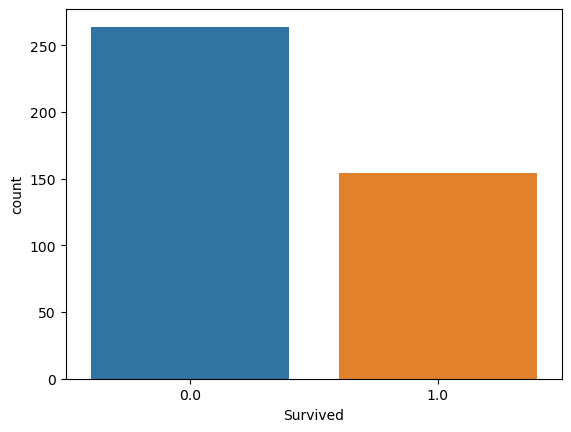

In [42]:
sns.countplot(x=df_bos['Survived']);

In [43]:
df_bos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  Title        418 non-null    object 
 13  Alone        418 non-null    int32  
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 47.4+ KB


In [44]:
df_bos['Survived'] = df_bos['Survived'].astype(int)

In [45]:
df_bos[["PassengerId", "Survived"]].to_csv("akaban_titanic2.csv", index=False)

## Sonuç

Bu projede Titanik verilerinden `train` veri seti kullanılarak model eğitilmiş `test` verisi üzerinde tahminlerde bulunulmuştur.